# MINOR Project

## loading the data

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv("state_wise.csv")
data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,698817,424963,19707,254064,06/07/2020 12:51:25,83,TT,969,69,7,NaN
1,Maharashtra,206619,111740,8822,86040,05/07/2020 21:06:27,17,MH,0,0,0,17 cases were marked as non-covid deaths in MH...
2,Tamil Nadu,111151,62778,1510,46863,05/07/2020 20:07:27,0,TN,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,99444,71339,3067,25038,05/07/2020 19:06:27,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat..."
4,Gujarat,36123,25900,1944,8279,05/07/2020 20:37:34,0,GJ,0,0,0,NaN


## info of the data 

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              38 non-null     object
 1   Confirmed          38 non-null     int64 
 2   Recovered          38 non-null     int64 
 3   Deaths             38 non-null     int64 
 4   Active             38 non-null     int64 
 5   Last_Updated_Time  38 non-null     object
 6   Migrated_Other     38 non-null     int64 
 7   State_code         38 non-null     object
 8   Delta_Confirmed    38 non-null     int64 
 9   Delta_Recovered    38 non-null     int64 
 10  Delta_Deaths       38 non-null     int64 
 11  State_Notes        14 non-null     object
dtypes: int64(8), object(4)
memory usage: 3.7+ KB


In [56]:
data.isnull().sum()

State                 0
Confirmed             0
Recovered             0
Deaths                0
Active                0
Last_Updated_Time     0
Migrated_Other        0
State_code            0
Delta_Confirmed       0
Delta_Recovered       0
Delta_Deaths          0
State_Notes          24
dtype: int64

## Percentage of null value 

In [57]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

State_Notes          63.157895
Delta_Deaths          0.000000
Delta_Recovered       0.000000
Delta_Confirmed       0.000000
State_code            0.000000
Migrated_Other        0.000000
Last_Updated_Time     0.000000
Active                0.000000
Deaths                0.000000
Recovered             0.000000
Confirmed             0.000000
State                 0.000000
dtype: float64

## Analysis  on data one state wise

### droping unwanted value 

In [58]:
data=data.drop(['State_Notes','Delta_Deaths','Delta_Recovered','Delta_Confirmed',
                'State_code', 'Migrated_Other', 'Last_Updated_Time'],axis=1)
data=data.drop([0])
data.head()

,State,Confirmed,Recovered,Deaths,Active
1,Maharashtra,206619,111740,8822,86040
2,Tamil Nadu,111151,62778,1510,46863
3,Delhi,99444,71339,3067,25038
4,Gujarat,36123,25900,1944,8279
5,Uttar Pradesh,27707,18761,785,8161


## Creating the Column for Recovered and Death Percentage

In [59]:
data['Recovered_percentage']=data.Recovered/data.Confirmed*100
data['Death_percentage']=data.Deaths/data.Confirmed*100

In [60]:
data

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
1,Maharashtra,206619,111740,8822,86040,54.080215,4.269694
2,Tamil Nadu,111151,62778,1510,46863,56.479924,1.358512
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
4,Gujarat,36123,25900,1944,8279,71.699471,5.381613
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
7,West Bengal,22126,14711,757,6658,66.487390,3.421314
8,Madhya Pradesh,14930,11411,608,2911,76.430007,4.072338
9,Haryana,17005,12944,265,3796,76.118789,1.558365
10,State Unassigned,4913,0,0,4913,0.000000,0.000000


## Highest death and recovered percentage

### Death Percentage 

In [61]:
data.sort_values(by='Death_percentage',ascending=False)

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
4,Gujarat,36123,25900,1944,8279,71.699471,5.381613
1,Maharashtra,206619,111740,8822,86040,54.080215,4.269694
8,Madhya Pradesh,14930,11411,608,2911,76.430007,4.072338
7,West Bengal,22126,14711,757,6658,66.487390,3.421314
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219
18,Punjab,6283,4408,164,1711,70.157568,2.610218
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
11,Karnataka,23474,9849,372,13249,41.957059,1.584732
15,Jammu and Kashmir,8429,5255,132,3042,62.344288,1.566022


### Recovered Percentage

In [62]:
data.sort_values(by='Recovered_percentage',ascending=False)

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
28,Chandigarh,466,395,6,65,84.763948,1.287554
24,Ladakh,1005,826,1,178,82.189055,0.099502
20,Uttarakhand,3124,2524,42,530,80.793854,1.344430
21,Chhattisgarh,3207,2578,14,615,80.386654,0.436545
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
8,Madhya Pradesh,14930,11411,608,2911,76.430007,4.072338
23,Tripura,1580,1206,1,373,76.329114,0.063291
9,Haryana,17005,12944,265,3796,76.118789,1.558365
13,Bihar,11860,8765,90,3005,73.903879,0.758853
22,Jharkhand,2815,2045,20,750,72.646536,0.710480


## Graph for confirmed cases all over India 

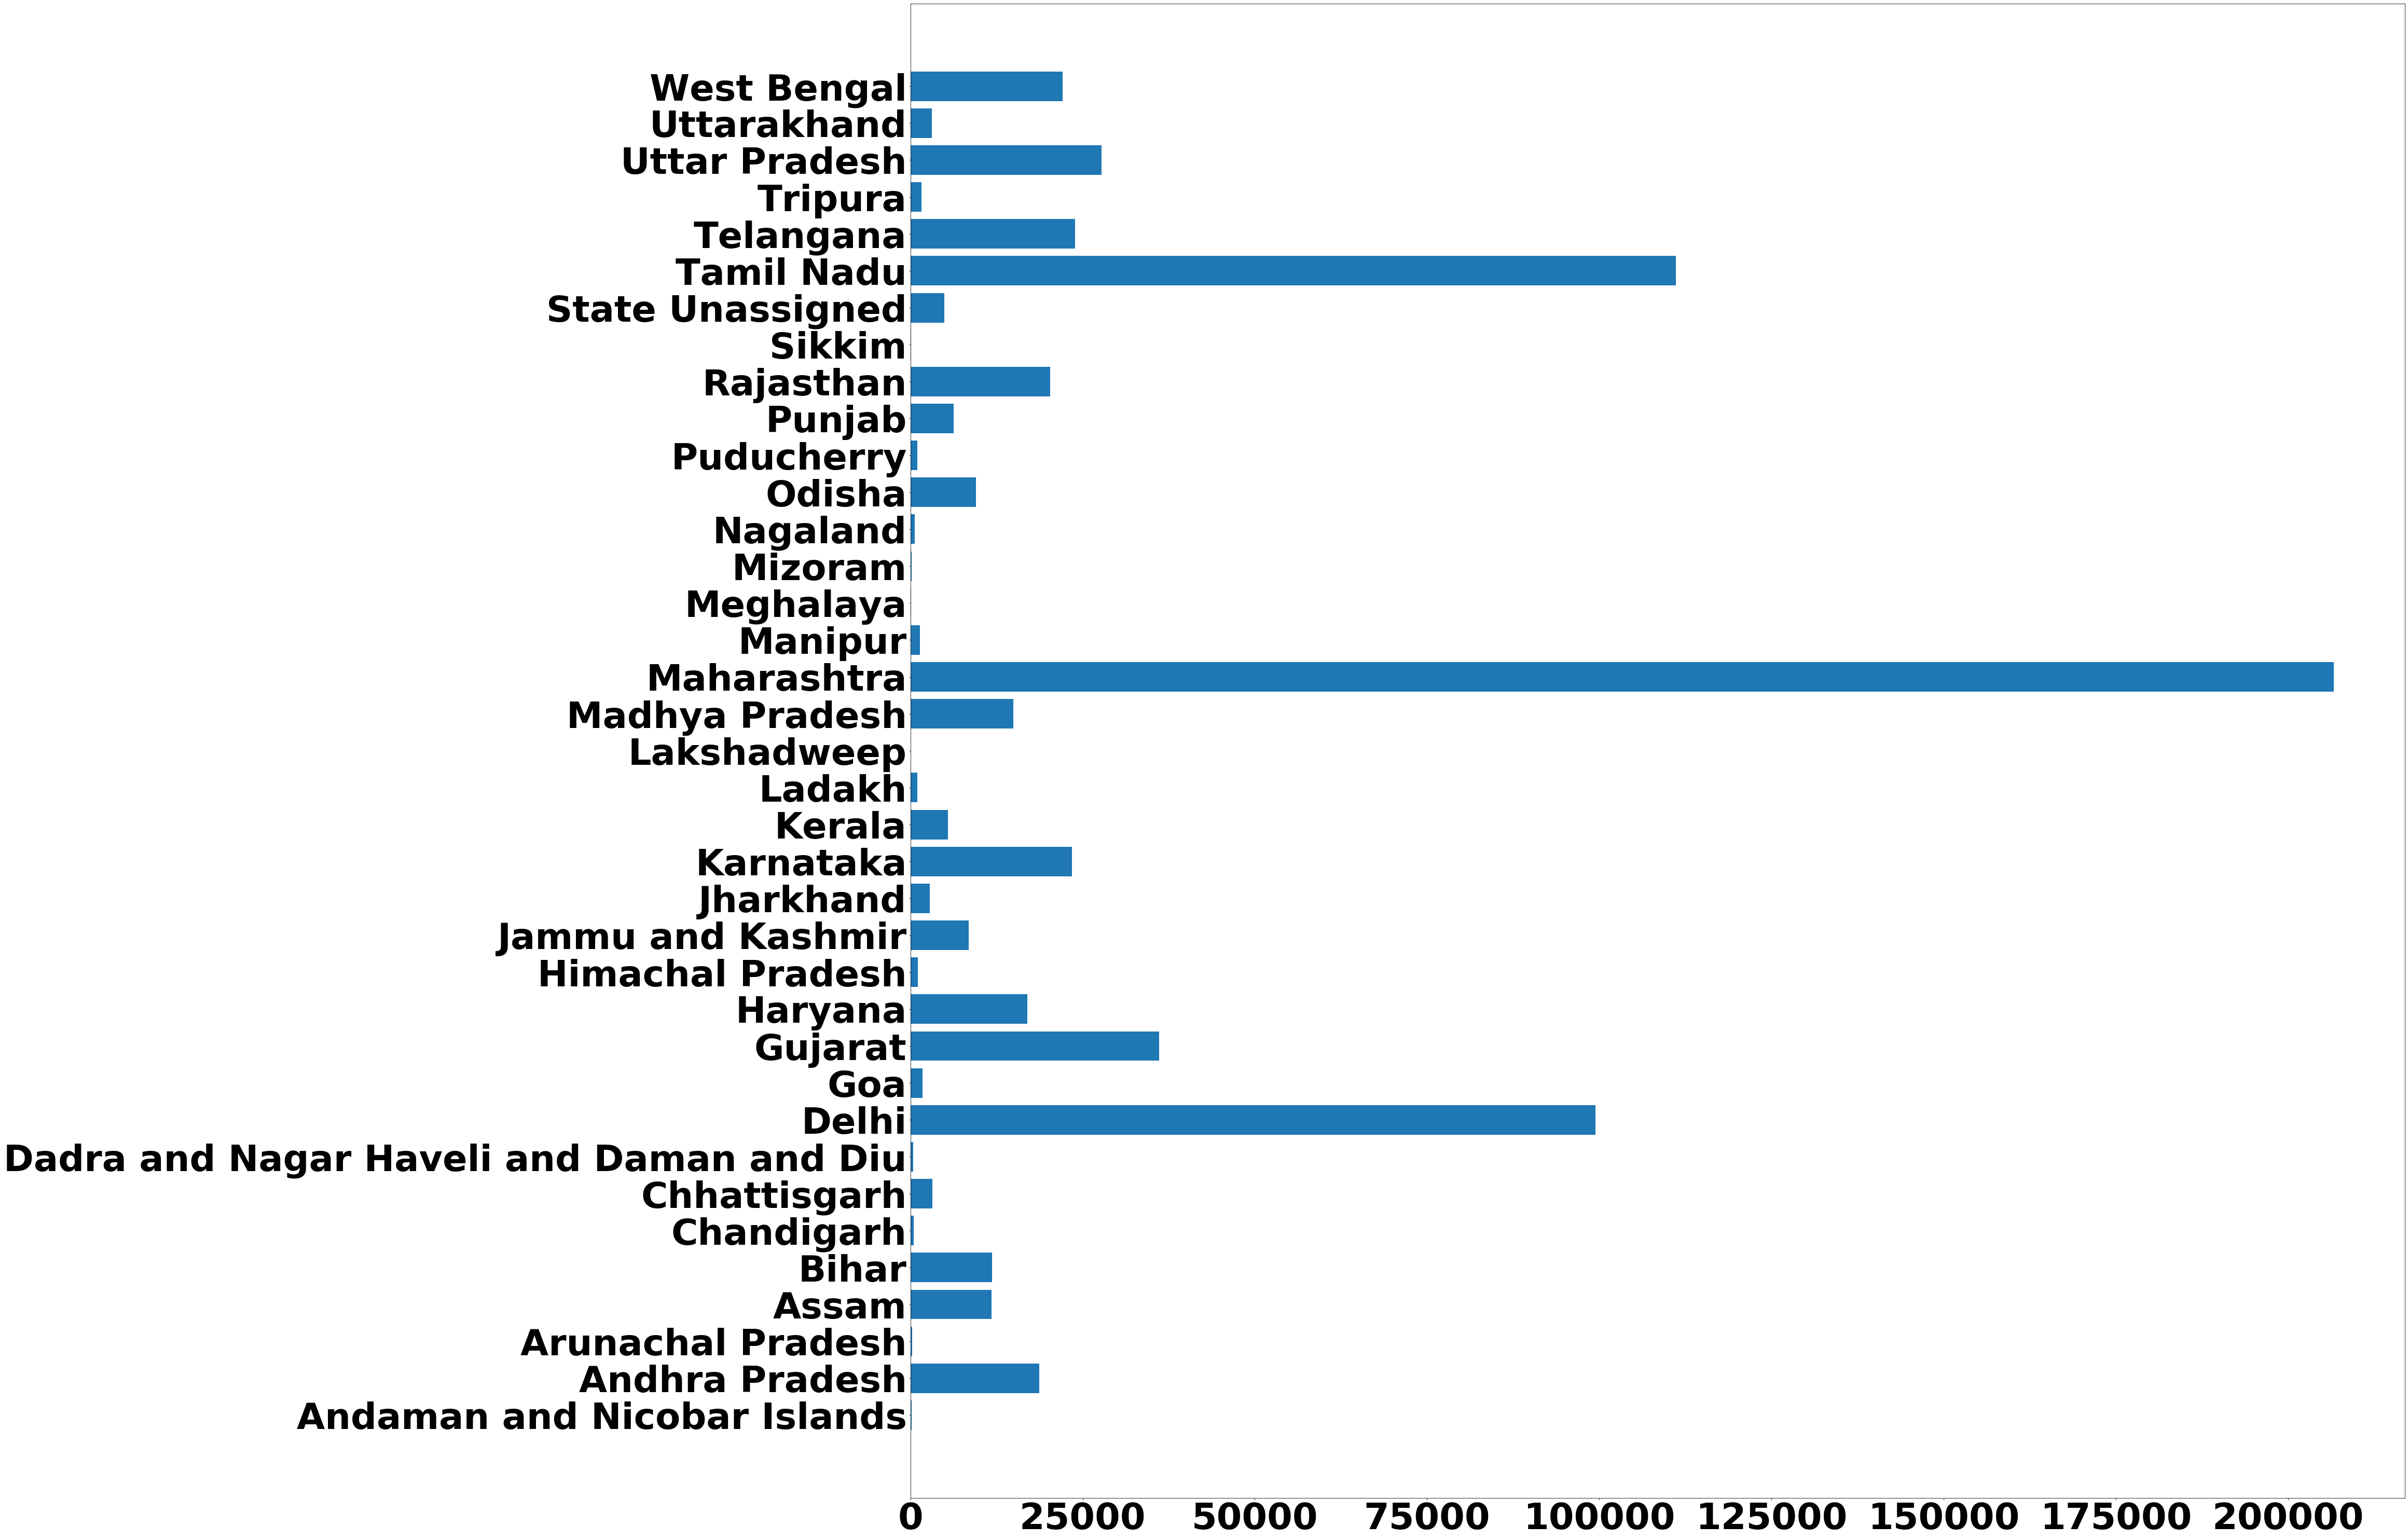

In [63]:
x=data.groupby('State').Confirmed.sum()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 70}

plt.rc('font', **font)
fig = plt.figure(figsize=(40,40))
ax = fig.add_axes([0,0,1,1])
state =x.index
confirmed = x.values

ax.barh(state,confirmed)
plt.savefig('covid India analisys .png')
plt.show()

## Star Question for the analysis  in Delhi State and nearby states

In [64]:
concentration=data.loc[[3,6,9,5]]
concentration

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
9,Haryana,17005,12944,265,3796,76.118789,1.558365
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219


## Death percentage in the area of focus

In [65]:
concentration.sort_values(by='Death_percentage',ascending=False)


,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
9,Haryana,17005,12944,265,3796,76.118789,1.558365


## Recovered percentage in the area of focus

In [66]:
concentration.sort_values(by='Recovered_percentage',ascending=False)

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
9,Haryana,17005,12944,265,3796,76.118789,1.558365
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219


## Highest death in the area of focus

In [67]:
concentration.sort_values(by='Deaths',ascending=False)

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
9,Haryana,17005,12944,265,3796,76.118789,1.558365


## Highest recovery in the area of focus

In [68]:
concentration.sort_values(by='Recovered',ascending=False)

,State,Confirmed,Recovered,Deaths,Active,Recovered_percentage,Death_percentage
3,Delhi,99444,71339,3067,25038,71.737863,3.084148
5,Uttar Pradesh,27707,18761,785,8161,67.712131,2.833219
6,Rajasthan,20263,15965,459,3839,78.788926,2.265212
9,Haryana,17005,12944,265,3796,76.118789,1.558365


## Grouping the state with confirmed cases 

In [69]:
x=concentration.groupby('State').Confirmed.sum()
x

State
Delhi            99444
Haryana          17005
Rajasthan        20263
Uttar Pradesh    27707
Name: Confirmed, dtype: int64

## Graph for confermed cases , state wise

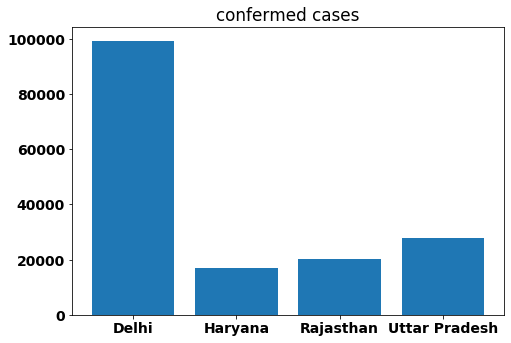

In [70]:
fig = plt.figure()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
ax = fig.add_axes([0,0,1,1])
state =x.index
confirmed = x.values 
ax.bar(state,confirmed)
plt.title("confermed cases")
plt.show()

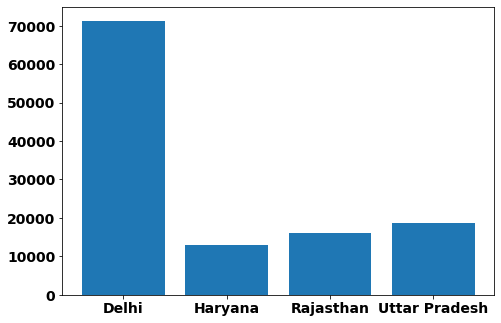

In [35]:
x=concentration.groupby('State').Recovered.sum()
x
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
state =x.index
confirmed = x.values 
ax.bar(state,confirmed)
plt.title("Recovered cases")
plt.show()

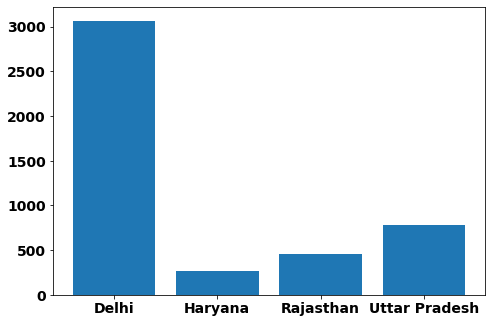

In [36]:
x=concentration.groupby('State').Deaths.sum()
x
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
state =x.index
confirmed = x.values 
ax.bar(state,confirmed)
plt.show()

## DATA 2 raw_data.csv

### statewise_tested_numbers_data

In [37]:
new=pd.read_csv("data.csv")
new.head()

,Updated On,State,Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Corona Enquiry Calls,Num Calls State Helpline,Source1,Source2,Unnamed: 22,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,01/06/20,Delhi,217537,Tested,20834,196703,NaN,NaN,NaN,NaN,...,NaN,1031.0,https://delhifightscorona.in/wp-content/upload...,https://t.me/indiacovid/6067,NaN,9.58%,10.98,10979,10,19814000
1,02/06/20,Delhi,223607,Tested,22132,201475,NaN,NaN,NaN,NaN,...,NaN,1031.0,https://t.me/indiacovid/6188,NaN,NaN,9.90%,11.29,11285,10,19814000
2,03/06/20,Delhi,230145,Tested,23645,206500,NaN,NaN,NaN,NaN,...,NaN,1031.0,https://delhifightscorona.in/wp-content/upload...,NaN,NaN,10.27%,11.62,11615,10,19814000
3,04/06/20,Delhi,236506,Tested,25004,211502,NaN,NaN,NaN,NaN,...,NaN,1031.0,https://delhifightscorona.in/wp-content/upload...,https://twitter.com/CMODelhi/status/1268587154...,NaN,10.57%,11.94,11936,9,19814000
4,05/06/20,Delhi,241693,Tested,26334,215359,NaN,NaN,NaN,NaN,...,NaN,1031.0,https://delhifightscorona.in/wp-content/upload...,https://twitter.com/CMODelhi/status/1268933777...,NaN,10.90%,12.20,12198,9,19814000


In [38]:
new=new[['Updated On','State','Test positivity rate','Tests per thousand']].dropna()

In [39]:
new

,Updated On,State,Test positivity rate,Tests per thousand
0,01/06/20,Delhi,9.58%,10.98
1,02/06/20,Delhi,9.90%,11.29
2,03/06/20,Delhi,10.27%,11.62
3,04/06/20,Delhi,10.57%,11.94
4,05/06/20,Delhi,10.90%,12.20
...,...,...,...,...
115,26/06/20,Uttar Pradesh,3.26%,2.86
116,27/06/20,Uttar Pradesh,3.25%,2.95
117,28/06/20,Uttar Pradesh,3.24%,3.04
118,29/06/20,Uttar Pradesh,3.23%,3.15


## Tests/1k Versus Test positivity rate during the month of June

Text(0, 0.5, 'Test positivity rate')

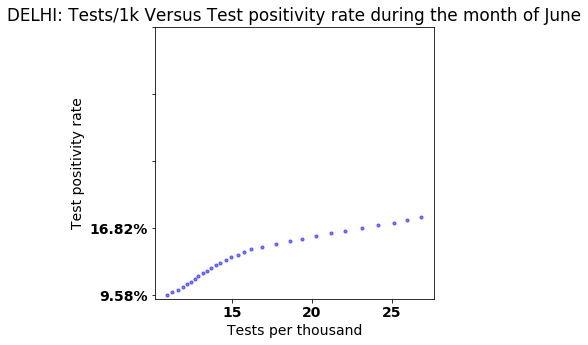

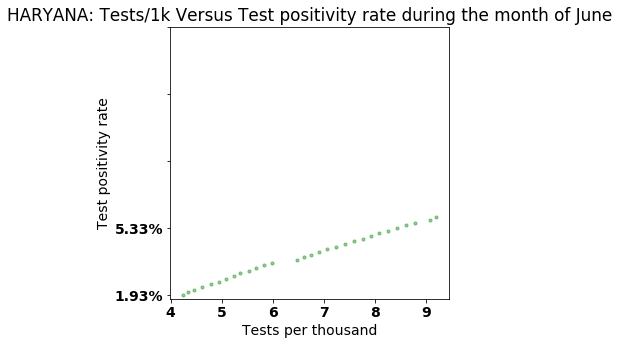

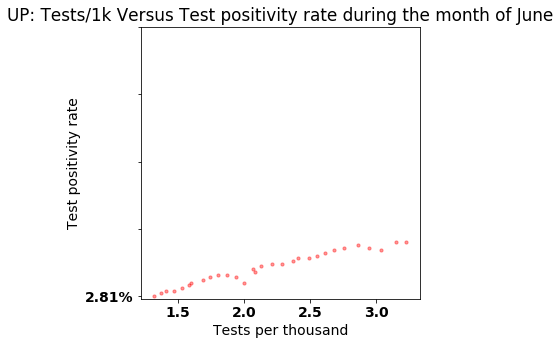

In [40]:
DL = new[new['State']=='Delhi']
HR = new[new['State']=='Haryana']
UP = new[new['State']=='Uttar Pradesh']


plt.figure(figsize=(5,5))
plt.scatter(DL['Tests per thousand'], DL['Test positivity rate'], s=10, c="b", alpha=0.5)
plt.yticks([0,25,50,75,100])
plt.title("DELHI: Tests/1k Versus Test positivity rate during the month of June")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

plt.figure(figsize=(5,5))
plt.scatter(HR['Tests per thousand'], HR['Test positivity rate'], s=10, c="g", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("HARYANA: Tests/1k Versus Test positivity rate during the month of June")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")

plt.figure(figsize=(5,5))
plt.scatter(UP['Tests per thousand'], UP['Test positivity rate'], s=10, c="r", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("UP: Tests/1k Versus Test positivity rate during the month of June")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")


 

## Tested cases in states 

In [41]:
new=pd.read_csv("data.csv")
new=new[['State','Tested']].dropna()

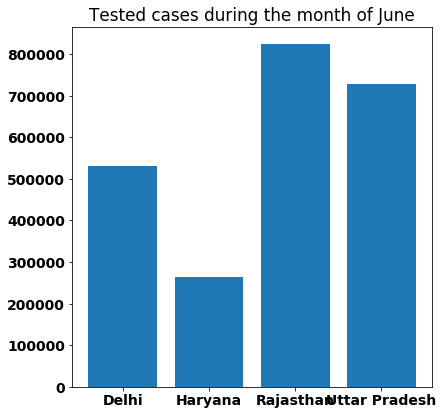

In [42]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
state =new['State']
confirmed =new['Tested'] 
ax.bar(state,confirmed)
plt.title("Tested cases during the month of June")
plt.show()

## Positive cases 

In [43]:
new=pd.read_csv("data.csv")
new=new[['State','Positive']].dropna()

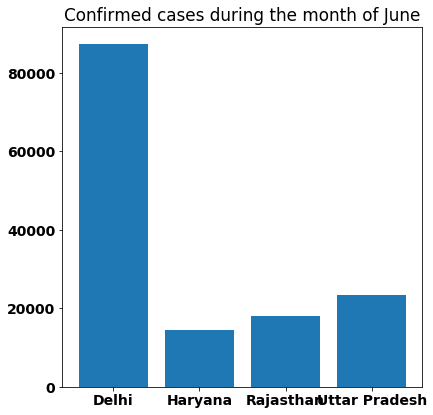

In [44]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
state =new['State']
confirmed =new['Positive'] 
ax.bar(state,confirmed)
plt.title("Confirmed cases during the month of June")
plt.show()

## Negative cases

In [45]:
new=pd.read_csv("data.csv")
new=new[['State','Negative']].dropna()

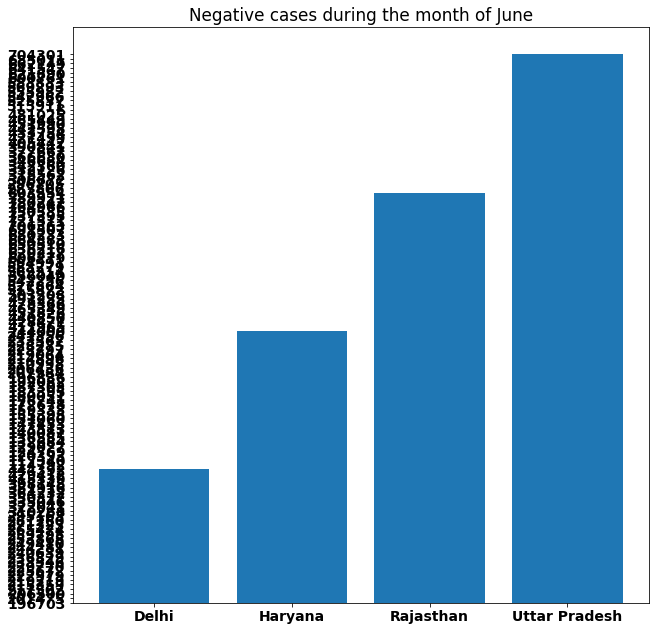

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
state =new['State']
confirmed =new['Negative']
ax.bar(state,confirmed)
plt.title("Negative cases during the month of June")
plt.show()
## i dont know what happend here ^-^
## i am very bad with matplot